### Steps for data science 
0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for out problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together

### 0. An end-to-end Scikit-learn workflow

In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
# import warnings
# #warnings.filterwarnings('ignore')
# warnings.filterwarnings('default')
#conda list scikit-learn 
#conda search scikit-learn --info

In [28]:
import sklearn
sklearn.show_versions()


System:
    python: 3.7.5 (default, Oct 31 2019, 15:18:51) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\SarboPc\Anaconda3\envs\dataScience\python.exe
   machine: Windows-10-10.0.18362-SP0

Python dependencies:
       pip: 19.3.1
setuptools: 42.0.2.post20191203
   sklearn: 0.22.1
     numpy: 1.17.4
     scipy: 1.4.1
    Cython: None
    pandas: 0.25.3
matplotlib: 3.1.2
    joblib: 0.14.1

Built with OpenMP: True


In [2]:
#1. Get the data ready

heart_disease = pd.read_csv('data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
# Create X (features matrix)
X = heart_disease.drop("target", axis=1)
# Create y (labels)
y = heart_disease["target"]

In [6]:
#2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
#instantiating the model
clf = RandomForestClassifier()

# We'll keep the default hyperparameters 
clf.get_params() 

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [8]:
# 3. Fit the model to the training data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2)

In [9]:
# putting semi-colon hides the output..try toggle yourself
clf.fit(X_train,y_train);

In [11]:
# make a prediction

y_label = clf.predict(np.array([0,2,3,4]))

ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [12]:
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [13]:
y_test

103    1
15     1
280    0
22     1
222    0
      ..
187    0
269    0
282    0
221    0
270    0
Name: target, Length: 61, dtype: int64

In [14]:
# 4. Evaluate the model on the training data and test data
clf.score(X_train,y_train)

1.0

In [15]:
clf.score(X_test,y_test)

0.819672131147541

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        33
           1       0.81      0.79      0.80        28

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [19]:
confusion_matrix(y_test,y_preds)

array([[28,  5],
       [ 6, 22]], dtype=int64)

In [20]:
accuracy_score(y_test,y_preds)

0.819672131147541

In [24]:
# 5. Improve a model
# Try different amount of n_estimators

np.random.seed(42)
for i in range(10 ,100 ,10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
    print(f"Model accuracy on test set: {clf.score(X_test,y_test)*100:.2f} %")
    print()

Trying model with 10 estimators...
Model accuracy on test set: 78.69 %

Trying model with 20 estimators...
Model accuracy on test set: 81.97 %

Trying model with 30 estimators...
Model accuracy on test set: 83.61 %

Trying model with 40 estimators...
Model accuracy on test set: 83.61 %

Trying model with 50 estimators...
Model accuracy on test set: 85.25 %

Trying model with 60 estimators...
Model accuracy on test set: 85.25 %

Trying model with 70 estimators...
Model accuracy on test set: 88.52 %

Trying model with 80 estimators...
Model accuracy on test set: 86.89 %

Trying model with 90 estimators...
Model accuracy on test set: 83.61 %



In [25]:
# 6. Save a model and load it
import pickle

pickle.dump(clf,open("random_forest_model_1.pkl","wb"))

In [29]:
loaded_model = pickle.load(open("random_forest_model_1.pkl","rb"))
loaded_model.score(X_test,y_test)

C:\Users\SarboPc\Anaconda3\envs\dataScience\lib\site-packages\ipykernel_launcher.py:1: ResourceWarning: unclosed file <_io.BufferedReader name='random_forest_model_1.pkl'>
  """Entry point for launching an IPython kernel.


0.8360655737704918

#### Data Cleaning Process

In [2]:
#1.1 Make sure it's all numerical
car_sales = pd.read_csv('E:\DS\zero-to-mastery-ml-master\zero-to-mastery-ml-master\data\car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [3]:
len(car_sales)

1000

In [13]:
car_sales["Doors"].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [4]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [9]:
# Split the data set X/y
X = car_sales.drop("Price",axis=1)
y = car_sales['Price']

#Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [11]:
# Build machine learning model
# Regressor means predicting value
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

ValueError: could not convert string to float: 'Toyota'

In [17]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder() #Transformer
transformer = ColumnTransformer([("one_hot", # just a name
                                  one_hot, # transformer
                                  categorical_features # list of features to transform
                                 )],
                                 remainder='passthrough' #transformer
                               )
                                  
transformed_X = transformer.fit_transform(X)
transformed_X                                  

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [18]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [19]:
# another method
dummies = pd.get_dummies(car_sales[['Make','Colour','Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [21]:
# trying refit the model after converting into numerical values(onehot encoding)
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(transformed_X,y,test_size=0.2)
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [22]:
model.score(X_test,y_test)

0.3235867221569877

##### dealing with missing values
1. Fill them with some values (also k/a imputation).
2. Remove the samples with missing data altogether.

In [2]:
# importing the data
car_sales_missing = pd.read_csv("E:\DS\zero-to-mastery-ml-master\zero-to-mastery-ml-master\data\car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [24]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [25]:
car_sales_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
Make             951 non-null object
Colour           950 non-null object
Odometer (KM)    950 non-null float64
Doors            950 non-null float64
Price            950 non-null float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


In [26]:
X = car_sales_missing.drop('Price',axis=1)
y= car_sales_missing['Price']

In [28]:
# converting data to numeric
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import ColumnTransformer

categorical_features = ['Make','Colour','Doors']
one_hot = OneHotEncoder()
transfomer = ColumnTransformer([('one_hot',one_hot,categorical_features)],
                              remainder='passthrough')
transformed_X = transfomer.fit_transform(X)
transformed_X

ValueError: Input contains NaN

In [29]:
car_sales_missing["Doors"].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

#### Option 1: Fill missing data with Pandas

In [3]:
# Fill the "Make" column
car_sales_missing['Make'].fillna("missing", inplace=True)

#Fill the "Colour" column -> categorical values
car_sales_missing['Colour'].fillna("missing", inplace=True)

#Fill the "Odometer (KM)" column -> numerial values
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(),inplace=True)

#Fill the "Doors" column with highest frequency data
car_sales_missing['Doors'].fillna(4,inplace=True)

In [13]:
car_sales_missing['Make'].value_counts()

Toyota     379
Honda      292
Nissan     183
BMW         97
missing     49
Name: Make, dtype: int64

In [7]:
# checking the dataframe again after filling missing values
car_sales_missing.isna().sum

<bound method DataFrame.sum of       Make  Colour  Odometer (KM)  Doors  Price
0    False   False          False  False  False
1    False   False          False  False  False
2    False   False          False  False  False
3    False   False          False  False  False
4    False   False          False  False  False
..     ...     ...            ...    ...    ...
995  False   False          False  False  False
996  False   False          False  False  False
997  False   False          False  False  False
998  False   False          False  False  False
999  False   False          False  False  False

[1000 rows x 5 columns]>

In [5]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [34]:
# cause Price column it the label('target'), we're droping the missing rows
car_sales_missing.dropna(inplace=True)

In [35]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [37]:
# need to split the data again
X = car_sales_missing.drop('Price',axis=1)
y = car_sales_missing['Price']

In [38]:
# from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import ColumnTransformer

categorical_features = ['Make','Colour','Doors']
one_hot = OneHotEncoder()
transfomer = ColumnTransformer([("one_hot", one_hot,categorical_features)],
                              remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

#### option 2: Fill missing values using scikit-learn

In [14]:
# importing the data
car_sales_missing = pd.read_csv("E:\DS\zero-to-mastery-ml-master\zero-to-mastery-ml-master\data\car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [40]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [15]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=['Price'], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [42]:
len(car_sales_missing)

950

In [16]:
# Split into X & y
X = car_sales_missing.drop('Price',axis=1)
y = car_sales_missing['Price']

In [17]:
# Filling missing values with scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy='constant',fill_value="missing")
door_imputer = SimpleImputer(strategy='constant',fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ['Make','Colour']
door_feature = ["Doors"]
num_feature = ["Odometer (KM)"]

#Create an imputer (smthing that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer",cat_imputer,cat_features),
    ("door_imputer",door_imputer,door_feature),
    ("num_imputer",num_imputer,num_feature)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [18]:
# conveting arrays to pandas DataFrame
car_sales_filled = pd.DataFrame(filled_X,
                               columns=['Make','Colour','Doors','Odometer (KM)'])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577


In [47]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [19]:
car_sales_filled['Make'].value_counts()

Toyota     354
Honda      281
Nissan     175
BMW         93
missing     47
Name: Make, dtype: int64

In [21]:
# again trying to convert categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make','Colour','Doors']
one_hot = OneHotEncoder()

transformer = ColumnTransformer([('one_hot',one_hot,categorical_features)],
                               remainder='passthrough')

transformed_X = transformer.fit_transform(filled_X)
transformed_X

ValueError: Specifying the columns using strings is only supported for pandas DataFrames

In [22]:
categorical_features = ['Make','Colour','Doors']
one_hot = OneHotEncoder()

transformer = ColumnTransformer([('one_hot',one_hot,categorical_features)],
                               remainder='passthrough')

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [23]:
# Now we've got our data as numbers and filled(no missing values)
#let's fit a model

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X,y,test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.21990196728583944

#### 2. Choosing the right estimator/algorithm for our problem

scikit-learn uses estimator as another term for machine learning model or algorithm.
* Classification- predicting whether a sample is one thing or another
* Regression - predicting a number

Step-1: Check the Scikit-learn machine learning map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

#### 2.1 Picking a mL model for a regression problem

In [3]:
# import Boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston #dictionary

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
boston_df = pd.DataFrame(boston["data"],columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [27]:
len(boston_df)

506

In [28]:
# let's try Ridge Regression model
from sklearn.linear_model import Ridge

#setup random seed
np.random.seed(42)

#Create the data
X = boston_df.drop("target",axis=1)
y = boston_df['target']

# split the data into training and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)

#Instantiate Ridge model
model = Ridge()
model.fit(X_train,y_train)


#check the score of the Ridge model on test data
model.score(X_test,y_test)

0.6662221670168522

#### How to improve the score?

#### What if Ridge is not working?

In [30]:
# trying random forest
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

#Split the data 
X = boston_df.drop("target",axis=1)
y= boston_df["target"]

# Spliting the data into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate the model
model_rf = RandomForestRegressor()

# fitting the data into model
model_rf.fit(X_train,y_train)

# accuracy of the model
model_rf.score(X_test,y_test)


0.873969014117403

### 2.2 Choosing and estimator for Classification problem

In [33]:
heart_disease.tail(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [34]:
len(heart_disease)

303

In [35]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target",axis=1)
y = heart_disease['target']

# split the data
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# instantiate the model
clf_Lsvm = LinearSVC()

#fit the model to data
clf_Lsvm.fit(X_train,y_train)

# accuracy of the model
clf_Lsvm.score(X_test,y_test)

C:\Users\SarboPc\Anaconda3\envs\dataScience\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.4918032786885246

In [36]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [37]:
# trying ensemble method
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Instantiate the model
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train,y_train)

# Evaluate the model
clf_rf.score(X_test,y_test)

0.8360655737704918

#### Titbit:
    1. If you have structure data use ensemble methods
    2. If you have unstructure data use DeepLearning or transfer learning

### 3. Fit the model/algorithm on our data use it to make predictions

##### 3.1 Fitting the model to the data

Different names for:
* `X` = features, features variables, data
* `y` = labels, targets, target variables

In [ ]:
"""
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target",axis=1)
y = heart_disease['target']

# split the data
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# instantiate the model
clf_Lsvm = LinearSVC()
b
#fit the model to data
clf_Lsvm.fit(X_train,y_train)

# Evaluating of the model(using the pattern found by model to predict)
clf_Lsvm.score(X_test,y_test)

"""

#### 3.2 Make predictions using a machine learning model
2 ways to make predictions:
    * 1. predict()
    * 2. predict_proba()

In [39]:
# use a trained model to make prediction
#clf.predict(np.array([1,2,3,4]))  # this doesn't work as it is 1d array
clf_rf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [40]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [41]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf_rf.predict(X_test)
np.mean(y_preds == y_test)

0.8360655737704918

In [42]:
clf_rf.score(X_test,y_test)

0.8360655737704918

In [43]:
# another way for model evaluation
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_preds)

0.8360655737704918

#### Make rediction with `predict_proba()`

In [45]:
# predict_proba() returns probabilities of classification label

clf_rf.predict_proba(X_test[:5])

array([[0.95, 0.05],
       [0.38, 0.62],
       [0.45, 0.55],
       [0.86, 0.14],
       [0.21, 0.79]])

In [46]:
# let's predict() on the same data
clf_rf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

`predict()` can also be used for regression models

In [51]:
from sklearn.ensemble import RandomForestRegressor

#setup random seed
np.random.seed(42)

#Split the data 
X = boston_df.drop("target",axis=1)
y= boston_df["target"]

# Spliting the data into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
#Instantiate and fit model
model = RandomForestRegressor().fit(X_train,y_train)

# Make predictions
y_preds = model.predict(X_test)

In [52]:
y_preds[:5]

array([23.002, 30.826, 16.734, 23.467, 16.853])

In [54]:
np.array(y_test[:5])

array([23.6, 32.4, 13.6, 22.8, 16.1])

In [55]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

2.1226372549019623

#### 4. Evaluating ML model

Three ways to evaluate Scikit-Learn models/estimators:
* 1. Estimator `score` method
* 2. The `scoring` parameter
* 3. Problem-specific `metrics` functions

##### 4.1 Evaluating a model with `score` method

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X= heart_disease.drop("target",axis=1)
y = heart_disease["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf_rfc = RandomForestClassifier().fit(X_train,y_train)


In [7]:
clf_rfc.score(X_test,y_test)

0.8524590163934426

##### 4.2 Evaluating a model using `scoring` parameter

In [59]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X= heart_disease.drop("target",axis=1)
y = heart_disease["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf_rfc = RandomForestClassifier().fit(X_train,y_train);

In [61]:
clf_rfc.score(X_test,y_test)

0.8524590163934426

In [62]:
cross_val_score(clf_rfc,X,y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [64]:
np.random.seed(42)

# single training and test split score
clf_single_score = clf_rfc.score(X_test,y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf_rfc,X,y,cv=5))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [68]:
# Default scoring parameter of classifier = mean accuracy
clf_rfc.score(X_test,y_test)

0.8524590163934426

In [67]:
# Scoring parameter set to None by default
cross_val_score(clf_rfc,X,y,cv=10,scoring=None)

array([0.90322581, 0.80645161, 0.83870968, 0.9       , 0.9       ,
       0.83333333, 0.73333333, 0.83333333, 0.73333333, 0.83333333])

#### 4.2.1 Classification model evaluation metrics
* 1. Accuracy
* 2. Area under ROC curve
* 3. Confusion matrix
* 4. Classification report

##### Accuracy

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf,X,y,cv=5)

In [9]:
np.mean(cross_val_score)

0.8248087431693989

In [10]:
print(f"Heart Disease Classifier Accuracy: {np.mean(cross_val_score)*100:.2f} % ")

Heart Disease Classifier Accuracy: 82.48 % 


** Area under the receiver operating characteristic curve (AUC/ROC) **
* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate (tpr) versus a models false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [11]:
# Create X_test .. etc
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

In [16]:
from sklearn.metrics import roc_curve

#Fit the classifier
clf.fit(X_train,y_train)
# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:5],len(y_probs)

(array([[0.57, 0.43],
        [0.23, 0.77],
        [0.52, 0.48],
        [0.72, 0.28],
        [0.58, 0.42]]), 61)

In [17]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:5]

array([0.43, 0.77, 0.48, 0.28, 0.42])

In [18]:
# Calulate fpr,tpr and thresholds
fpr,tpr,thresholds = roc_curve(y_test,y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.        , 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.03448276, 0.10344828, 0.10344828,
       0.10344828, 0.13793103, 0.17241379, 0.17241379, 0.27586207,
       0.27586207, 0.31034483, 0.34482759, 0.34482759, 0.37931034,
       0.37931034, 0.4137931 , 0.4137931 , 0.44827586, 0.44827586,
       0.65517241, 0.65517241, 0.82758621, 0.96551724, 1.        ])

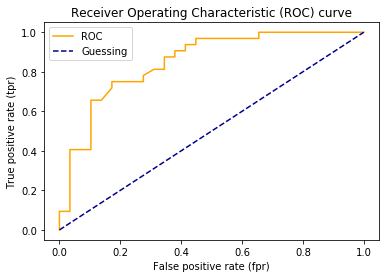

In [21]:
# Create a function for plotting ROC curves
#import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr):
    """
    Plots a ROC curve given the false positive rate(fpr)
    and trure positive rate(tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr,tpr,color='orange',label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr,tpr)

In [22]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

0.849676724137931

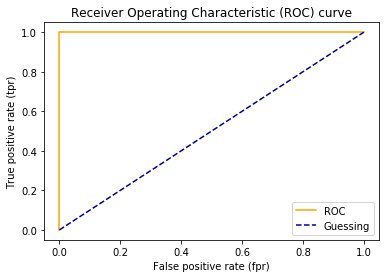

In [25]:
# Plot perfect ROC curve and AUC score
fpr,tpr,thresholds = roc_curve(y_test,y_test)
#fpr,tpr
plot_roc_curve(fpr,tpr)

In [24]:
# Perfect AUC score
roc_auc_score(y_test,y_test)

1.0

*** Confusion Matrix ***
A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused

In [27]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)
confusion_matrix(y_test,y_preds)

array([[22,  7],
       [ 8, 24]], dtype=int64)

In [29]:
# Visaulize confusion matrix with pd.crosstab()

pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Labels"],
           colnames=["Predictied Labels"])

Predictied Labels,0,1
Actual Labels,,
0,22,7
1,8,24


In [ ]:
#installing from jupyter notebook
#import sys
# !ls # for bash cmd
# prefix => path where to install
#!conda install --yes --prefix {sys.prefix} seaborn

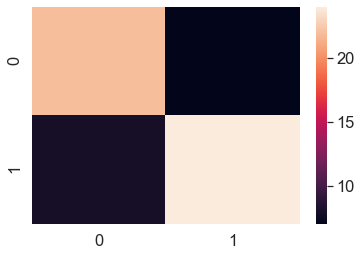

In [30]:
# Make our confusion matrix with seaborn heatmap
import seaborn as sns


# Set the font scale 
sns.set(font_scale=1.5)

#Create a confusion matrix
conf_mat = confusion_matrix(y_test,y_preds)

#plot it using Seaborn
sns.heatmap(conf_mat)

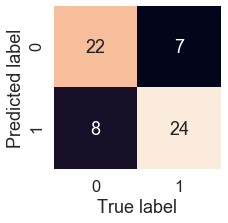

In [34]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                    annot = True, # Annotate the boxes with conf_mat info
                    cbar= False) # color bar
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    # Fix the broken annotations ( this happened in Matplotlib 3.1.1)
    #bottom,top = ax.get_ylim()
    #ax.set_ylim(bottom+0.5,top-0.5)
    
plot_conf_mat(conf_mat)

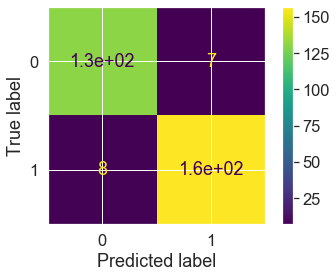

In [35]:
# doesn't work as supposed, so we are using seaborn or pandas as above
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,X,y)

#### Classfication Report

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75        29
           1       0.77      0.75      0.76        32

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



In [40]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict= True
                                  ))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics:
    
    * Accuracy is a good measure to start with if all classes are balanced(e.g. same amount of samples which are labelled with 0 or 1)
    * Precision and recall become more important when classes are imbalanced.
    * If false positive predictions are worse than false negative,aim for higher precision.
    * If false negative are worse than false positives, aim for higher recall.
    * F1-score is a combination of precision and recall.
    

#### 4.2.2 Regression model evaluation metrics
model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html
1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

**R^2**
What R^2 does: Compares your models predictions to the mean of the targets. Values can range from negative infinity(a very poor model) to 1. For example, if all your model does is predict the mean of the target, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^3 value would be 1.

In [7]:
from sklearn.ensemble import RandomForestRegressor
from  sklearn.model_selection import train_test_split
np.random.seed(42)

X = boston_df.drop("target",axis=1)
y = boston_df["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor().fit(X_train,y_train);

In [42]:
model.score(X_test,y_test)

0.873969014117403

In [8]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test),y_test.mean())

In [46]:
y_test.mean()

21.488235294117644

In [47]:
r2_score(y_test,y_test_mean)

0.0

In [48]:
r2_score(y_test,y_test)

1.0

#### Mean absolute error (MAE)

MAE is the average of the absolute differences between predictions and actual values. It gives you an idea of how wrong our models predictions are.

In [11]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_train)
# MAE
mae = mean_absolute_error(y_test,y_preds)
mae

ValueError: Found input variables with inconsistent numbers of samples: [102, 404]

In [12]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
# MAE
mae = mean_absolute_error(y_test,y_preds)
mae

2.1226372549019623

In [14]:
df = pd.DataFrame(data={"actual values": y_test,
                       "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df

,actual values,predicted values,differences
173,23.6,23.002,-0.598
274,32.4,30.826,-1.574
491,13.6,16.734,3.134
72,22.8,23.467,0.667
452,16.1,16.853,0.753
...,...,...,...
412,17.9,13.030,-4.870
436,9.6,12.490,2.890
411,17.2,13.406,-3.794
86,22.5,20.219,-2.281


**Mean Squared Error**

In [16]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
#MSE
mse = mean_squared_error(y_test,y_preds)
mse

9.242328990196082

In [19]:
# Calculate MSE by hand4
squared =np.square(df["differences"])
squared.mean()

9.242328990196082

***Which regression metric should you use?***
* R^2 is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your ***R^2*** value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.
* ***MAE*** gives a better indication of how far off each of your model's predictions are on average.
* As for ***MAE or MSE***, beacause of the way MSE is calculated, squaring the differences between predicted and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).
 * Pay more attention to MAE: When being $10000$ off is twice as bad as being $5000$ off.
 * Pay more attention to MSE: When being $10000$ off is more than twice as bad as being $5000$ off.

#### 4.3.2 Finally usig `scoring` parameter

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()

In [22]:
np.random.seed(42)

cv_acc = cross_val_score(clf,X,y,cv=5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [23]:
# Cross-validated accuracy
print(f'The cross-validated accuracy is:{np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is:82.48%


In [26]:
np.random.seed(42)
cv_acc = cross_val_score(clf,X,y,cv=5,scoring="accuracy")
print(f'The cross-validated accuracy is:{np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is:82.48%


In [27]:
#Precision
np.random.seed(42)
cv_precision = cross_val_score(clf,X,y,cv=5,scoring="precision")
print(f'The cross-validated precision is:{np.mean(cv_precision)*100:.2f}%')

The cross-validated precision is:83.30%


In [28]:
# Recall
np.random.seed(42)
cv_precision = cross_val_score(clf,X,y,cv=5,scoring="recall")
print(f'The cross-validated recall is:{np.mean(cv_precision)*100:.2f}%')

The cross-validated precision is:85.45%


In [29]:
# F1-score
np.random.seed(42)
cv_precision = cross_val_score(clf,X,y,cv=5,scoring="f1")
print(f'The cross-validated F1 score is:{np.mean(cv_precision)*100:.2f}%')

The cross-validated F1 score is:84.27%


How about our regression model?

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target",axis=1)
y = boston_df["target"]

model = RandomForestRegressor()

In [32]:
np.random.seed(42)
cv_r2 = cross_val_score(model,X,y,cv=5,scoring=None)
np.mean(cv_r2)

0.622375083951403

In [33]:
np.random.seed(42)
cv_r2 = cross_val_score(model,X,y,cv=5,scoring='r2')
cv_r2

array([0.76861165, 0.85851765, 0.74941131, 0.47891315, 0.25642166])

In [35]:
# Mean absolute error
cv_mae = cross_val_score(model,X,y,cv=5,scoring="neg_mean_absolute_error")
cv_mae

array([-2.12751961, -2.53956436, -3.42026733, -3.82432673, -3.06893069])

In [36]:
# Mean squared error
cv_mse = cross_val_score(model,X,y,cv=5,scoring="neg_mean_squared_error")
np.mean(cv_mse)

-21.02253826604542

#### 4.3 using different evaluation metrics as Scikit-Learn functions
##### Classification evaluation functions

In [37]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier().fit(X_train,y_train)

# Make some predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier

print("Classifier metrics on the test ser")
print(f"Accuracy: {accuracy_score(y_test,y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test,y_preds)}")
print(f"Recall: {recall_score(y_test,y_preds)}")
print(f"F1-score: {f1_score(y_test,y_preds)}")

Classifier metrics on the test ser
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1-score: 0.8615384615384615


***Regression evaluation functions***

In [39]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = boston_df.drop("target",axis=1)
y = boston_df['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor().fit(X_train,y_train)

# Make predictions using our regression model
y_preds = model.predict(X_test)

# Evaluate the regression model
print("Regression model metrics on the test set")
print(f"R^2:{r2_score(y_test,y_preds)}")
print(f"MAE:{mean_absolute_error(y_test,y_preds)}")
print(f"MSE:{mean_squared_error(y_test,y_preds)}")

Regression model metrics on the test set
R^2:0.8739690141174031
MAE:2.1226372549019623
MSE:9.242328990196082


#### 5. Improving a model

first predictions = baseline predictions
first model = baseline model

From a data perspective:
* Could we collect more data? (generally, the more data, the better)
* Could we improve our data? 

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters vs parameters
* Parameters = model find these patterns in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters:
* 1. By Hand (hit & trial)
* 2. Randomly with RandomSearchCV
* 3. Exhaustively with GridSearchCV

In [40]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [42]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### 5.1 Tuning hyperparameters by hand
Let's make 3 sets, training,validation and test.

We're going to try and adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_sam`ples_split`
* `n_estimators`

In [55]:
def evaluate_preds(y_true,y_preds):
    """
    Performs evaluation comparison on y_true vs y_preds labels on a classification model.
    """
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    metric_dict = {"accuracy": round(accuracy,2),
                  "precision": round(precision,2),
                  "recall": round(recall,2),
                  "f1": round(f1,2)}
    print(f"Acc: {accuracy *100:.2f} %")
    print(f"Precision: {precision:.2f}")
    print(f"recall: {recall:.2f}")
    print(f"f1: {f1:.2f}")
    
    return metric_dict

In [56]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X & y
X = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled['target']

# Split the data into train, validation & test sets
train_split = round(0.7 * len(heart_disease_shuffled))  # 70 % of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))

X_train,y_train = X[:train_split],y[:train_split]
X_val,y_val = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

# Make baseline prediction on validation sets
y_preds = clf.predict(X_val)

# Evalute the classifier on validation set
baseline_metrics = evaluate_preds(y_val,y_preds)
baseline_metrics

Acc: 82.22 %
Precision: 0.81
recall: 0.88
f1: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [47]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [61]:
# Create different classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=500)
clf_2.fit(X_train,y_train)

# Make predictions with different hyperparameters
y_preds_2 = clf_2.predict(X_val)

# Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_val,y_preds_2)

Acc: 84.44 %
Precision: 0.85
recall: 0.88
f1: 0.86


#### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [64]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators":[10,100,200,500,1000,1200],
       "max_depth": [None,5,10,20,30],
       "max_features": ["auto","sqrt"],
       "min_samples_split": [2,4,6],
       "min_samples_leaf": [1,2,4]}

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter =10, #number of models to try
                           cv=5,
                           verbose =2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.5s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.1s
[CV] n_estimators=100, min_samples_split=4, min_samp

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.3s
[CV] n_estimators=1000, min_samples_split=4, min_s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   21.2s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [65]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [66]:
# Make predictions with the best hyperparameters

rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test,rs_y_preds)

Acc: 81.97 %
Precision: 0.77
recall: 0.86
f1: 0.81


#### 5.3 Hyperparameter tuning with GridSearchCV

In [67]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [68]:
# reducing the no. of hyperparameters
grid_2 = {"n_estimators":[100,200,500],
       "max_depth": [None],
       "max_features": ["auto","sqrt"],
       "min_samples_split": [6],
       "min_samples_leaf": [1,2]}

In [70]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                           param_grid=grid_2,
                           cv=5,
                           verbose =2)

# Fit the GridSearchCV
gs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.2s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.7s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.7s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.7s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=None, max_features=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   19.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=1,
                                              oob_score=False,
                                              random_s

In [71]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [72]:
# Make prediction with GridSearchCV
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test,gs_y_preds)

Acc: 78.69 %
Precision: 0.74
recall: 0.82
f1: 0.78


Let's compare our different models metrics

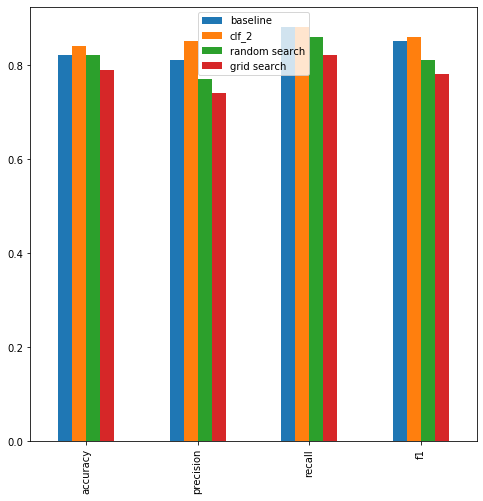

In [74]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                              "clf_2":clf_2_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})
compare_metrics.plot.bar(figsize=(8,8))

#### 6. Saving and loading trained machine learning models
Two ways to save and load Ml models:
1. With Python's `pickle` module
2. With the `joblib` module

***Pickle***

In [ ]:
import pickle

# Save an existing model to file
pickle.dumpl(gs_clf,open("gs_random_forest_model.pkl","wb")) # wb => write  binary

In [ ]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model.pkl","rb"))

In [ ]:
# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test,pickle_y_preds)

***Joblib***

In [ ]:
from joblib import dump, load

# Save model to file

dump(gs_clf,filename="gs_random_forest_model.joblib")

In [ ]:
# Import a saved joblib model
loaded_job_model = load(filename="gs_random_forest_model.joblib")

In [ ]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_job_model.predict(X_test)
evaluate_preds(y_test,joblib_y_preds)

#### 7. Putting it all together!

In [75]:
# using pipeline ...
data = pd.read_csv("E:\DS\zero-to-mastery-ml-master\zero-to-mastery-ml-master\data\car-sales-extended-missing-data.csv")
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [76]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [84]:
len(data)

950

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
Make             951 non-null object
Colour           950 non-null object
Odometer (KM)    950 non-null float64
Doors            950 non-null float64
Price            950 non-null float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


In [79]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [78]:
data.describe()

,Odometer (KM),Doors,Price
count,950.000000,950.000000,950.000000
mean,131253.237895,4.011579,16042.814737
std,69094.857187,0.382539,8581.695036
min,10148.000000,3.000000,2796.000000
25%,70391.250000,4.000000,9529.250000
50%,131821.000000,4.000000,14297.000000
75%,192668.500000,4.000000,20806.250000
max,249860.000000,5.000000,52458.000000


***Steps( all in one cell):***
    1. Fill missing data
    2. Convert data to numbers
    3. Build a model on the data

In [80]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random see
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv("E:\DS\zero-to-mastery-ml-master\zero-to-mastery-ml-master\data\car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"],inplace=True)

# Define different features and transformer pipeline
categorical_features = ["Make","Colour"]
categorical_transformer  =Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant",fill_value="missing"),
    ("one_hot",OneHotEncoder(handle_unknown="ignore")
])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant",fill_value=4))
])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputere",SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numeric)

preprocessor = ColumnTransformer(
                transformers={
                    ("cat",categorical_transformer,categorical_features),
                    ("door",door_transformer,door_feature),
                    ("num",numeric_transformer,numeric_features)
                })

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor",preprocessor),
                       ("model",RandomForestClassifier())])

# Split data
X = data.drop("Price",axis=1)
y = data["Price"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Fit and score the model
model.fit(X_train,y_train)
model.score(X_test,y_test)


TypeError: unhashable type: 'list'

In [106]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random see
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv("E:\DS\zero-to-mastery-ml-master\zero-to-mastery-ml-master\data\car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"],inplace=True)

print(data.isna().sum())
# Define different features and transformer pipeline
categorical_features = ["Make","Colour"]
categorical_transformer  =Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant",fill_value="missing")),
    ("one_hot",OneHotEncoder(handle_unknown="ignore"))
])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant",fill_value=4))
])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numeric)

preprocessor = ColumnTransformer(
                transformers=[
                    ("cat",categorical_transformer,categorical_features),
                    ("door",door_transformer,door_feature),
                    ("num",numeric_transformer,numeric_features)
                ])

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor",preprocessor),
                       ("model",RandomForestClassifier())])

# Split data
X = data.drop("Price",axis=1)
y = data["Price"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

print(len(X_train),len(X_test),len(y_train),len(y_test))

# Fit and score the model
model.fit(X_train,y_train)
model.score(X_test,y_test)

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64
760 190 760 190


0.0

It's also possible to use `GridSearchCV` or `RandomizedSearchCV` with the `Pipeline`

In [98]:
# Using GridSearchCV with our regression Pipeline
#from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy":["mean","median"],
    "model__n_estimators": [100,1000],
    "model__max_depth": [None,5],
    "model_max_features": ["auto"],
    "model__min_samples_split": [2,4]
}

gs_model = GridSearchCV(model,pipe_grid,cv=5,verbose=2)
gs_model.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


ValueError: n_splits=5 cannot be greater than the number of members in each class.

In [102]:
# Using GridSearchCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV,KFold

pipe_grid = {
    "preprocessor__num__imputer__strategy":["mean","median"],
    "model__n_estimators": [100,1000],
    "model__max_depth": [None,5],
    "model__max_features": ["auto"],
    "model__min_samples_split": [2,4]
}

gs_model = GridSearchCV(model,pipe_grid,cv=2,verbose=2)
gs_model.fit(X_train,y_train)

Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


C:\Users\SarboPc\Anaconda3\envs\dataScience\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.5s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_featur

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.3s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   2.3s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   2.4s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_s

[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:   57.5s finished


GridSearchCV(cv=2, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('cat',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                    

In [103]:
gs_model.score(X_test,y_test)

0.0